## **IMPORT**

In [1]:
from ChessCore import *
import time

## **TESTS**

### TEST FUNCTION

*Input:*
- `fen`: FEN string representing the current state of the game
- `king_moves_only`: Whether you want to see all possible moves or only the king's moves (Optional, default: `False`)
- `plot_moves`: Whether you want to plot the board after each of the possible moves (Optional, default: `False`)

*Output:* 
- Plots the board and all querried moves
- Measures execution time

In [2]:
def chess_move_generation_test(fen: str = None, king_moves_only: bool = False, plot_moves: bool = False):
    game = ChessGame() if fen is None else ChessGame(fen)

    start = time.time()
    moves = game.generate_all_moves()
    end = time.time()

    print(f'Execution time: {end - start} s')

    if king_moves_only:
        king_position = game.get_king_position(game.side_to_move())
        if king_position >= 0:
            moves = [move for move in moves if move.start_position() == king_position]

    if plot_moves:
        for move in moves:
            game_copy = game.copy()
            game_copy.move(move)
            game_copy.plot(moves=[move])
    else:
        game.plot(moves=moves)

### TEST 1: Default layout

- Default pieces placement
- White moves
- Castling rights:
    - White: king's side, queen's side
    - Black: king's side, queen's side

Execution time: 0.0010135173797607422 s


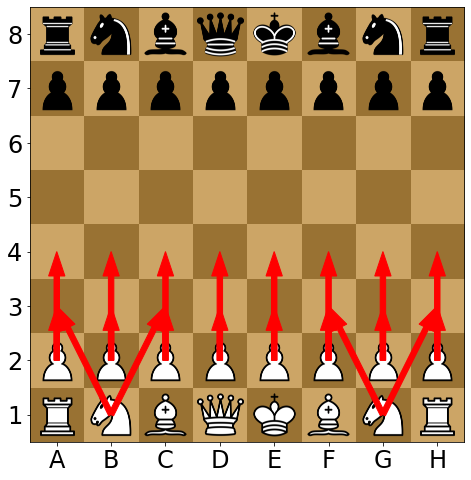

In [3]:
chess_move_generation_test()

### TEST 2: Castling

- White king and rooks didn't moved, black king moved
- White moves
- Castling rights:
    - White: king's side, queen's side
    - Black: none

*Note: Only king's moves are shown here to prevent confusion*

Execution time: 0.0 s


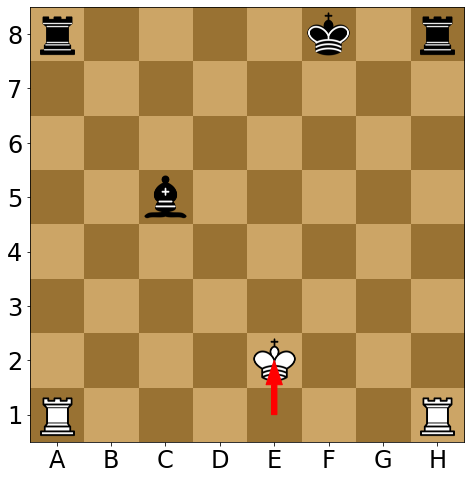

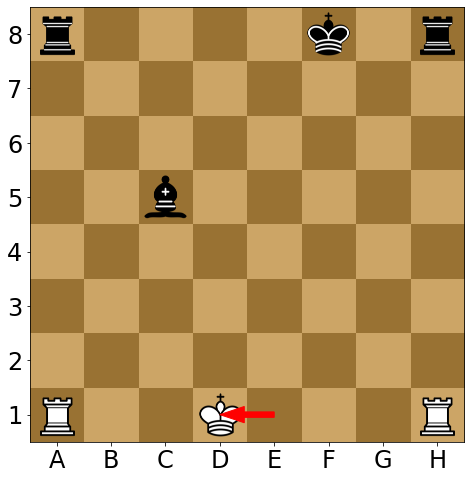

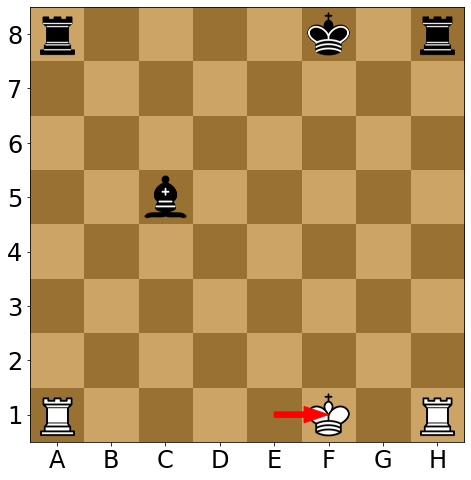

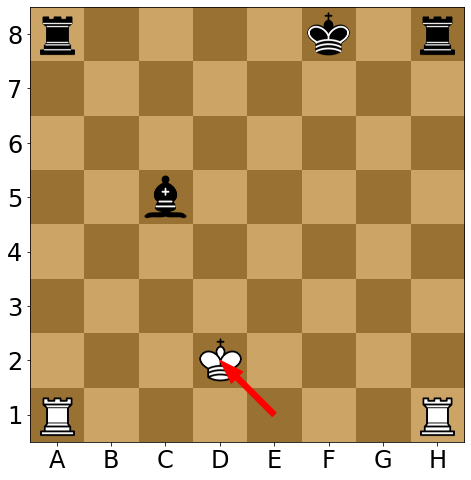

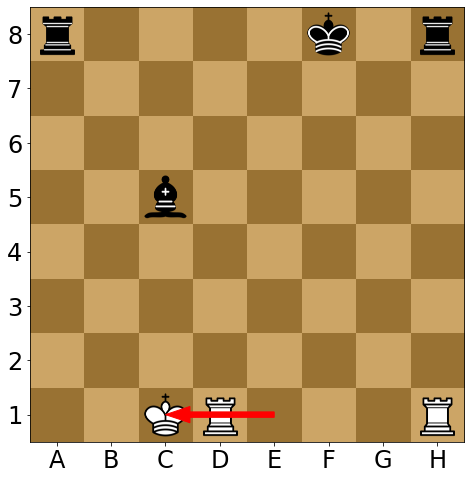

In [4]:
chess_move_generation_test('r4k1r/8/8/2b5/8/8/8/R3K2R w KQ - 0 42', king_moves_only=True, plot_moves=True)

### TEST 3: Pinned

- Black pawn is pinned by white queen and shouldn't be able to move
- Black moves
- Castling rights:
    - White: none
    - Black: none

Execution time: 0.0 s


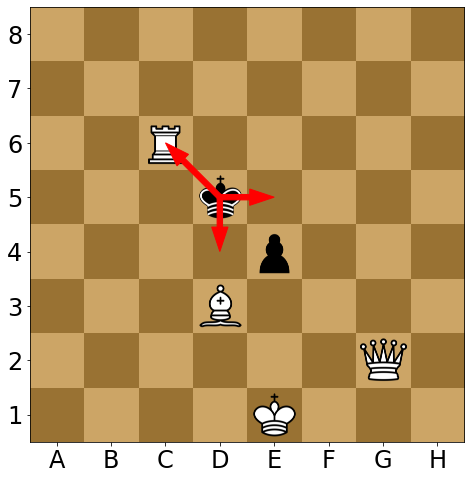

In [5]:
chess_move_generation_test('8/8/2R5/3k4/4p3/3B4/6Q1/4K3 b - - 0 1')

### TEST 4: Checked

- Black king is currently in check, and can either move away, block with the knight or capture the rook
- Black moves
- Castling rights:
    - White: none
    - Black: none

Execution time: 0.0 s


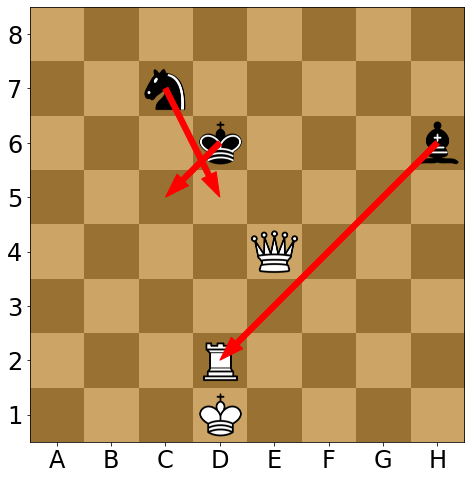

In [6]:
chess_move_generation_test('8/2n5/3k3b/8/4Q3/8/3R4/3K4 b - - 0 1')

### TEST 5: En passant

- White pawn has just moved up 2 spaces, and therefore can be captured via En passant
- Black moves
- Castling rights:
    - White: none
    - Black: none

Execution time: 0.0 s


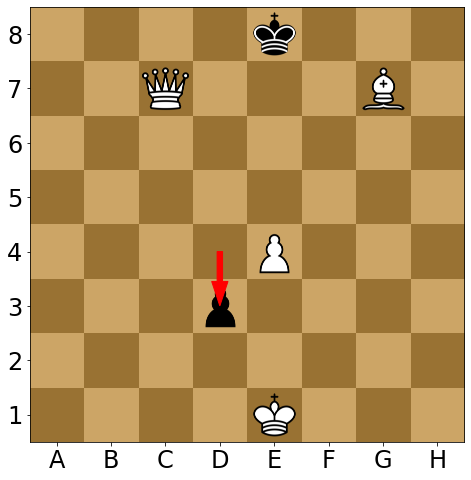

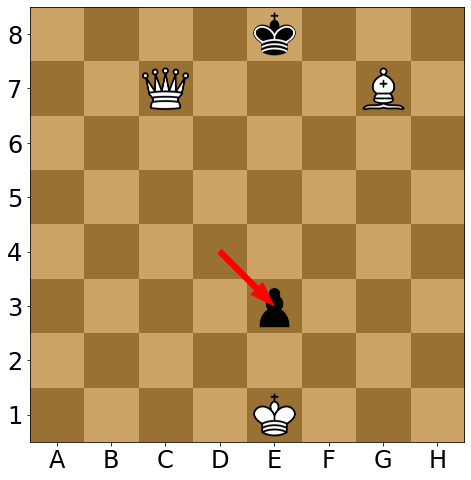

In [7]:
chess_move_generation_test('4k3/2Q3B1/8/8/3pP3/8/8/4K3 b - e3 0 1', plot_moves=True)

### TEST 6: Pawn's promotion

- White pawn is about to reach rank 8 and promote
- White moves
- Castling rights:
    - White: none
    - Black: none

Execution time: 0.0 s


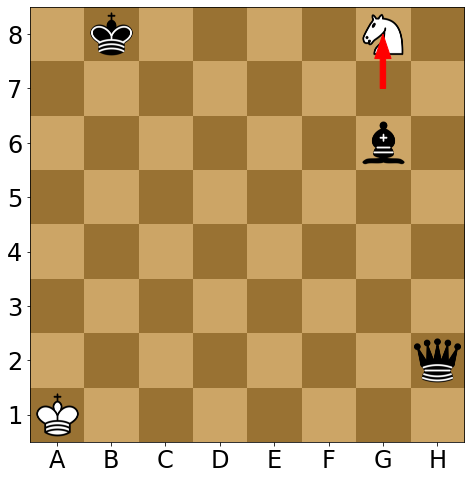

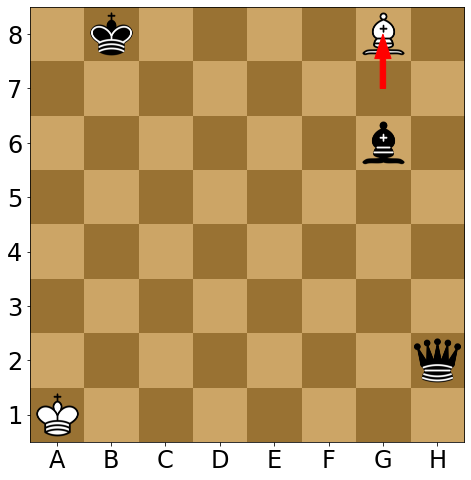

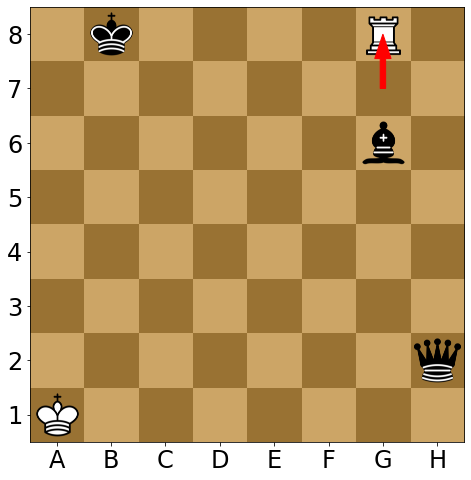

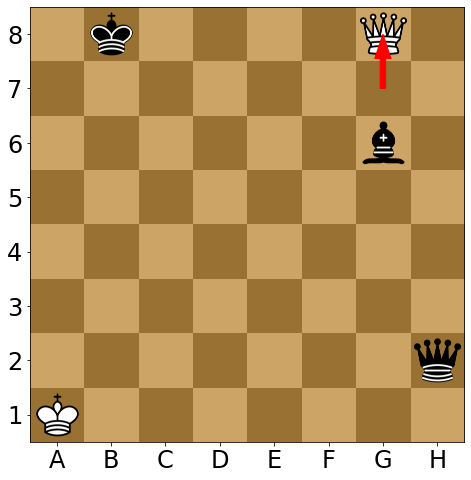

In [8]:
chess_move_generation_test('1k6/6P1/6b1/8/8/8/7q/K7 w - - 0 1', plot_moves=True)

### TEST 7: En passant special case

- Rare special case where if white captures via En passant it would create a check
- White moves
- Castling rights:
    - White: none
    - Black: none

Execution time: 0.0 s


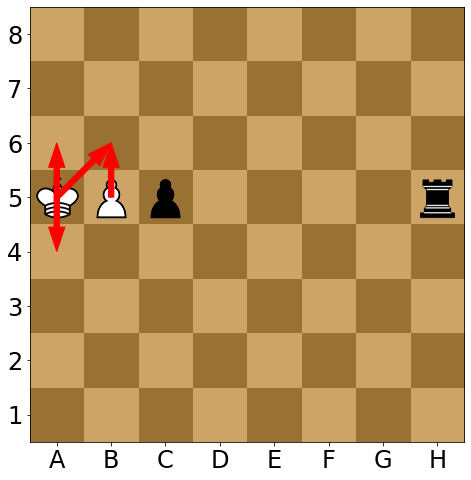

In [9]:
chess_move_generation_test('8/8/8/KPp4r/8/8/8/8 w - c6 0 1')